# Box - potential
---

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from quantum_mechanics import WaveFunction
from utils import box_potential


**Some initial presets**

In [42]:
N = 1000 # spatial discretization
Nt = 1000 # temporal discretization
n = np.arange(N) # for n-related stuff
x = np.linspace(0,1, N) # the spatial axis
t = np.linspace(0, 1, Nt) # temporal axis

potential_strength = 1e3
V = box_potential(N, potential_strength)

In [43]:
%time wave = WaveFunction(N, V)
%time wave.matrix_box_potential()
%time wave.solve_eigenvalues()

Wall time: 0 ns
Wall time: 0 ns
Wall time: 391 ms


In [44]:
psi0 = np.sqrt(2)*np.sin(np.pi*x)

In [45]:
%time wave.construct_psi(psi0, t)

Wall time: 181 ms


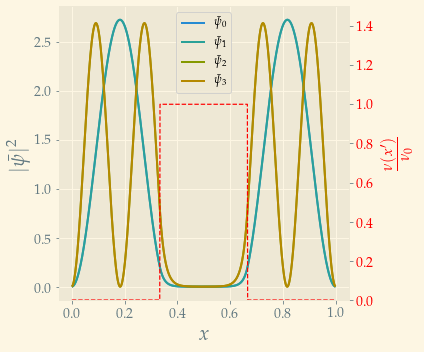

In [143]:
fig, ax = plt.subplots(figsize=(6, 5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.tick_params(axis='y')
ax.plot(x, np.abs(np.sqrt(N)*wave.v[:,0])**2, label = fr"$\bar\psi_0$")
ax.set_ylabel(fr"$|\bar\psi|^2$", size=20)
ax.set_xlabel(r"$x$", size=20)
ax.plot(x, np.abs(np.sqrt(N)*wave.v[:,1])**2, label = fr"$\bar\psi_1$")
ax.plot(x, np.abs(np.sqrt(N)*wave.v[:,2])**2, label = fr"$\bar\psi_2$")
ax.plot(x, np.abs(np.sqrt(N)*wave.v[:,3])**2, label = fr"$\bar\psi_3$")
ax.legend(fontsize=12)

ax2=ax.twinx()
ax2.plot(x, V/max(V),'--', lw=1.2,color = 'r')
ax2.grid()
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0,1.5)
ax2.set_ylabel(fr"$\frac{{\nu(x')}}{{\nu_0}}$", size=20, color='r')
ax2.yaxis.labelpad = 12
fig.tight_layout()
# plt.savefig("report/img/degeneracy.png", facecolor=fig.get_facecolor())

## Superpose 
---

In [153]:
initial = np.sqrt(wave.N)/(np.sqrt(2))*(wave.v[:,0] + wave.v[:,1])

In [158]:
t_stop = np.pi/(wave.e[1]-wave.e[0])
t_interval = np.linspace(0,t_stop, Nt)

In [160]:
%time wave.construct_psi(initial, t_interval)

Wall time: 233 ms


C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


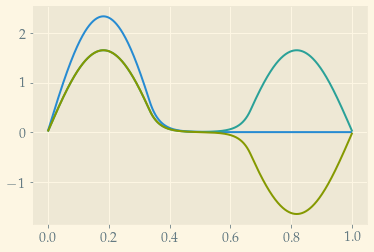

In [244]:
plt.plot(x, wave.psi[0])
plt.plot(x, np.sqrt(N)*wave.v[:,0])
plt.plot(x, np.sqrt(N)*wave.v[:,1])

In [197]:
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

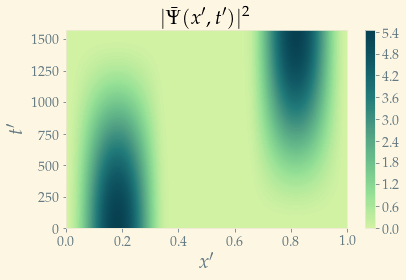

In [230]:
fig =plt.figure(figsize=(6, 4))
im =plt.contourf(x, t_interval,np.abs(wave.psi)**2,levels=100, cmap=emr)
bar = fig.colorbar(im)
bar.ax.tick_params(labelsize='14')
plt.xlabel(fr"$x'$",size=20)
plt.ylabel(fr"$t'$",size=20)
title = plt.title(fr"$|\bar\Psi(x', t')|^2$", size=20)
fig.tight_layout()
# plt.savefig("report/img/tunneling.pdf", facecolor=fig.get_facecolor())

## Root finding
---

In [419]:
from utils import f
M = 1000

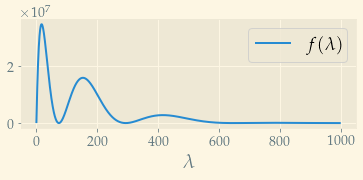

In [456]:
la = np.linspace(0, potential_strength, M)
plt.figure(figsize=(6, 2))
plt.plot(la, f(la, potential_strength), label=fr"$f(\lambda)$")
plt.xlabel(fr"$\lambda$", size=20)
plt.legend()

In [466]:
from utils import find_roots

In [472]:
roots = find_roots(wave.e, potential_strength)

In [ ]:
%%time 
N = 1000
r = []

v0 = np.linspace(0,100000, 20)
for i,v in enumerate(v0):
    print(f"{i}/{len(v0)}")
    V = box_potential(N,v)
    wf = WaveFunction(N, V)
    wf.matrix_box_potential()
    wf.solve_eigenvalues()
    %time roots = find_roots(wf.e, v)
    r.append(roots)

In [499]:
num_energy_lvls = [len(ri) for ri in r]

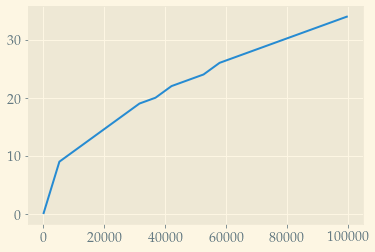

In [500]:
plt.plot(v0, num_energy_lvls)